In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import random

In [81]:
df = pd.read_csv("ODI-2025.csv",sep=";")
# remove unwanted columns 
df = df.drop(columns=["Timestamp", "Give a random number"])
df.head()

,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,MSc Artificial Intelligence,yes,unknown,mu,ja,male,yes,01-01-1888,400,78,0,00:00,Food,Travel
1,Artificial Intelligence,yes,1,sigma,ja,female,yes,31/01/2002,321,1000,2,12:30,sun,coffee
2,Econometrics,yes,1,mu,ja,male,not willing to say,September,200,101,4,0:30,Zonnetje,Aperol
3,Econometrics - Data Science,yes,0,mu,nee,male,yes,17/10/2003,350,60,6,23:00,Sun,Sun
4,Bioinformatics’s & Systems Biology,yes,1,mu,ja,male,yes,19/04/2000,500,50,8,12,-,-


In [133]:
# drop useless rows 
df.drop([239, 244], inplace=True)
# create copy
df1 = df.copy()
df1.columns

Index(['What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
       'When is your birthday (date)?',
       'How many students do you estimate there are in the room?',
       'What is your stress level (0-100)?',
       'How many hours per week do you do sports (in whole hours)? ',
       'Time you went to bed Yesterday', 'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')

## Start Imputation process

#### Course attendance

In [136]:
# unknown -> yes (mode)
replace = ["yes", "0", "mu", "ja"]

for idx, num in enumerate(range(1, 5)):
    print(df1.iloc[:, num].value_counts())
    print("\tUnknown -->  yes")
    df1.iloc[:, num].replace("unknown", replace[idx], inplace=True)
    print(df1.iloc[:, num].value_counts(), "\n")

Have you taken a course on machine learning?
yes        192
no          50
unknown      1
Name: count, dtype: int64
	Unknown -->  yes
Have you taken a course on machine learning?
yes    193
no      50
Name: count, dtype: int64 

Have you taken a course on information retrieval?
0          119
1          101
unknown     23
Name: count, dtype: int64
	Unknown -->  yes
Have you taken a course on information retrieval?
0    142
1    101
Name: count, dtype: int64 

Have you taken a course on statistics?
mu         169
sigma       45
unknown     29
Name: count, dtype: int64
	Unknown -->  yes
Have you taken a course on statistics?
mu       198
sigma     45
Name: count, dtype: int64 

Have you taken a course on databases?
ja         169
nee         66
unknown      8
Name: count, dtype: int64
	Unknown -->  yes
Have you taken a course on databases?
ja     177
nee     66
Name: count, dtype: int64 



C:\Users\agdse\AppData\Local\Temp\ipykernel_21256\1808377306.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1.iloc[:, num].replace("unknown", replace[idx], inplace=True)
C:\Users\agdse\AppData\Local\Temp\ipykernel_21256\1808377306.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

#### Gender 

In [137]:
print(df.iloc[:, 5 ].value_counts())
for i in range(len(df.iloc[:, 5])):
    if df1.iloc[i, 5] not in ["male", "female"]:
        df1.iloc[i, 5] = "other"

print(f"\nAfter cleaning:\n {df1.iloc[:, 5].value_counts()}")

What is your gender?
male                     137
female                    89
not willing to answer      8
gender fluid               4
intersex                   3
non-binary                 1
other                      1
Name: count, dtype: int64

After cleaning:
 What is your gender?
male      137
female     89
other      17
Name: count, dtype: int64


#### Birth dates

In [138]:
df.iloc[:, 7].unique()

array(['01-01-1888', '31/01/2002', 'September ', '17/10/2003',
       '19/04/2000', 'Tomorrow', '25/10/1999', '1 april', '29/01/2001',
       '01082000', '19/10/1999', '1-1-1999', '01012000', 'June 15 2001',
       '01', '27/02/2001', '10-05-1982', '16.12.1998', '23/06/2002',
       '10/08/2000', '30-12-2003', '11 August', 'Idk', '04/19/2000',
       '19/07/2003', '19 February ', '19.05.2000', 'September 14', '1999',
       '11.12.2001', '24.01.1999', '29-070-2000', '24 de Diciembre ',
       '01/06/2000', '11-11-00', '05.11.1997', '27-11-2002', '20/07/2001',
       '2000', '23-12-2002', '16/03/2002', '09-05-2002', '18-05-2003',
       '11/11/2002', '26', '29th September 2001', '21-11-2002',
       'December 14th', '2001-09-16', '1997', '16-08-1996', '69.69.2069',
       '26/11/1998', '23 maart', '14-09-2000', '-', '20.05.2001',
       '28-12-1999', 'January 16th', '23-05', '19 July 1997',
       '10/12/1994', '20.06', '30/09/2002', '01-01-1900', '23', '15-02',
       '13/03/2002', '08

In [139]:
# date reset if needed
df1.iloc[:, 7] = df.iloc[:, 7]

In [140]:
import re

# regular expressions
expres = [r"\d{2}[\/\.\-]\d{2}[\/\.\-](\d{4})",
            r"(\d{4})[\/\.\-]\d{2}[\/\.\-]\d{2}",
            r"\d{2}[\/\.\-]\d{2}[\/\.\-](\d{2})", 
            r"\b(19|20)\d{2}\b"]
# year group corresponding to regular expressions
years = [1, 1, 1, 0]
nans = []
nan_count = 0

# iterate iver 
for i in range(len(df1.iloc[:, 7])):

    date = df1.iloc[i, 7]
    updated = False

    
    # check if year can be found with regular expressions
    if date is not np.nan: 

        for idx, exp in enumerate(expres):
            match = re.search(exp, date)
            if match:
                # if match found and reasonable year, then use year
                if match.group(years[idx]) > "1975" and match.group(years[idx]) < "2020":
                    df1.iloc[i, 7] = match.group(years[idx])
                    print(f"year updated: {df1.iloc[i, 7]}")
                # unreasonable year -> Nan
                else:
                    df1.iloc[i, 7] = np.nan
                    nans.append(date)
                    nan_count += 1 
                # update flag and exit loop 
                updated = True 
                break
        
        if updated: 
            continue
        else: 
            # INPUTING NaN
            df1.iloc[i, 7] = np.nan
            nans.append(date)
            nan_count += 1 


year updated: 2002
year updated: 2003
year updated: 2000
year updated: 1999
year updated: 2001
year updated: 1999
year updated: 1999
year updated: 2001
year updated: 2001
year updated: 1982
year updated: 1998
year updated: 2002
year updated: 2000
year updated: 2003
year updated: 2000
year updated: 2003
year updated: 2000
year updated: 1999
year updated: 2001
year updated: 1999
year updated: 2000
year updated: 2000
year updated: 1997
year updated: 2002
year updated: 2001
year updated: 2000
year updated: 2002
year updated: 2002
year updated: 2002
year updated: 2003
year updated: 2002
year updated: 2000
year updated: 2001
year updated: 2002
year updated: 2001
year updated: 1997
year updated: 1996
year updated: 1998
year updated: 2000
year updated: 2001
year updated: 1999
year updated: 1997
year updated: 1994
year updated: 2002
year updated: 2002
year updated: 2001
year updated: 2001
year updated: 1999
year updated: 2001
year updated: 2001
year updated: 2002
year updated: 2001
year updated

In [141]:
print(nans, "\n", nan_count)

['01-01-1888', 'September ', 'Tomorrow', '1 april', '01082000', '01012000', '01', '11 August', 'Idk', '19 February ', 'September 14', '24 de Diciembre ', '11-11-00', '26', 'December 14th', '69.69.2069', '23 maart', '-', 'January 16th', '23-05', '20.06', '01-01-1900', '23', '15-02', '10112000', '08031998', 'January 9th', '28/05', 'not today', '13/02', 'X', '04 February ', '98/12/04', '-', 'Lol', '10-10', '20010831', '21052025', '05/01', 'Muhahahah', '07/08/1934', '20/09', '05082000', 'September', '25/12', '0000', '26', '07 232001', 'Mid February', '06/10', 'undisclosed', '12-12-1921', '05/12', '23/02', 'nonono', '11/6', '24th november', '13 january', '20.01', 'de vijftiende dag van de vierde maand', '00-00-0000', '9.4', 'December', '10/07', 'april 3rd', 'december', '01/09', 'December 27', '6-9-69', '23', 'September 5', '29-09', '28', '13', '19 january', 'October', 'June ', '13/07', 'When I was born', 'April 9th', '16 June', '9th of July', '26/11', '1/1/1', '22/02', '24.01.', '08.09', '/

When is your birthday (date)?
2001    36
2002    34
2000    30
2003    22
1999    14
1997     5
1998     4
2004     2
1982     1
1996     1
1994     1
2005     1
1991     1
1992     1
Name: count, dtype: int64 



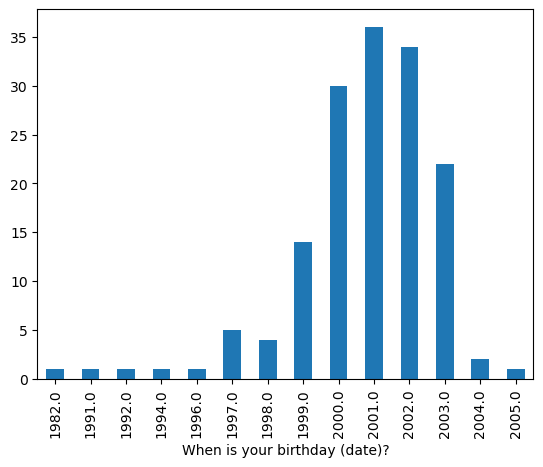

In [142]:
print(df1.iloc[:, 7].value_counts(), "\n")

# convert to int
df1.iloc[:, 7] = df1.iloc[:, 7].apply(lambda x: int(x) if pd.notna(x) else x)

df1.iloc[:, 7].value_counts().sort_index().plot(kind= "bar")
plt.show()

In [143]:
df1.iloc[:, 7].unique()

array([nan, 2002.0, 2003.0, 2000.0, 1999.0, 2001.0, 1982.0, 1998.0,
       1997.0, 1996.0, 1994.0, 2005.0, 2004.0, 1991.0, 1992.0],
      dtype=object)

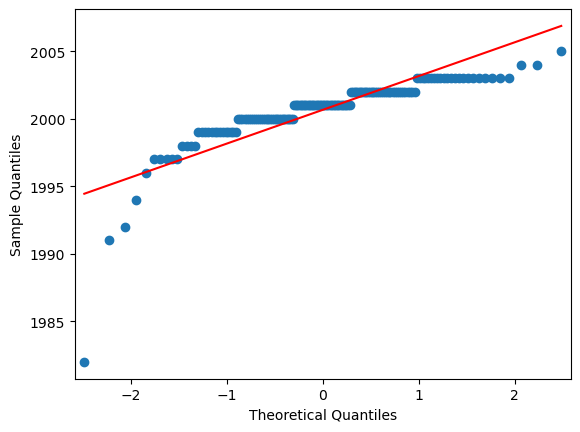

In [144]:
# check for normlity using QQplots to input values based on normal dist.
import statsmodels.api as sm

dummy_df = df1.iloc[:, 7].dropna()
print()
sm.qqplot(dummy_df.dropna(), line = "s")

plt.show()

Given the above histogram we can say that the data has kind of bellshape so we could approximate using normal distribution, but given the QQplot looks... not very nice we will model the data using a poisson distribution

In [145]:
# sampling from a poisson distribution 
def sample_poiss(lam, lb, ub):
    sample = np.random.poisson(lam=lam)
    # continue samping 
    while sample <= lb or sample >= ub:
        sample = np.random.poisson(lam=lam)
    
    return sample 

In [146]:
# data inputation by utilizing poisson dist

# lambda -> mean 
_lambda = np.mean(df1.iloc[:, 7])
# bounds
lb = np.min(df1.iloc[:, 7])
ub = np.max(df1.iloc[:, 7])

# fill in missing values
for i in range(len(df1.iloc[:, 7])):
    if np.isnan(df1.iloc[i, 7]):
        df1.iloc[i, 7] = sample_poiss(_lambda, lb, ub)

df1.iloc[:, 7] = df1.iloc[:, 7].astype(int)
df1.iloc[:, 7].value_counts()
        

When is your birthday (date)?
2000    41
2001    39
2002    39
2003    25
1999    20
1997    12
1994     8
1983     7
1998     6
1990     5
1993     4
1989     4
1991     4
1985     4
1992     4
2004     4
1984     3
1995     3
1987     3
1988     3
1986     2
1982     1
1996     1
2005     1
Name: count, dtype: int64

<Axes: xlabel='When is your birthday (date)?'>

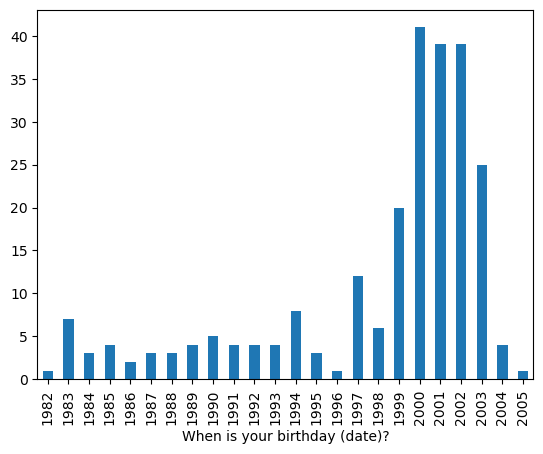

In [147]:
df1.iloc[:, 7].value_counts().sort_index().plot(kind ="bar")

#### Estimate of students

In [148]:
df1.iloc[:, 8].unique()

array(['400', '321', '200', '350', '500', '467', '250', '345', '300',
       '100', '550', '180-200', '456', '20*5*5', '487', '490', '450',
       '600', '320', '150', '375', '187', '80', '220', '430', '380', '5',
       '330', '385', '390', '195', '234', '480', '291', '420', '289',
       '70000', '425', '287', '483', 'approx 300', '240', '357', '297',
       '366', '123', '300ish?', '125', '378', 'Around 200', '280', '230',
       '118', 'Idk', '460', '340', '384', '9000', '311', '253', '-9999',
       '180', '458', '210', '10000', '387', '520'], dtype=object)

In [149]:
df1.iloc[:, 8] = df.iloc[:, 8]

In [150]:
express = [r"\b\d{3}\b|\d{3}"]

for i in range(len(df1.iloc[:, 8])):

    est = df1.iloc[i, 8]
    # loop over regular expressions
    for idx, exp in enumerate(express):
        # check if entrie is not NaN
        if pd.notna(est):
            # get pottential match 
            match = re.search(exp, est)

            # set value depening on match status & criterion 
            if match:
                mnum = match.group(0)
                if int(mnum) < 600 and int(mnum) > 50:
                    print(f"Pre imputation {mnum}")
                    df1.iloc[i, 8] = mnum
                    print(f"df1.iloc[{i}, 8] = {df1.iloc[i, 8 ]}")
                else: 
                    df1.iloc[i, 8] = np.nan
            else:
                df1.iloc[i, 8] = np.nan

            

Pre imputation 400
df1.iloc[0, 8] = 400
Pre imputation 321
df1.iloc[1, 8] = 321
Pre imputation 200
df1.iloc[2, 8] = 200
Pre imputation 350
df1.iloc[3, 8] = 350
Pre imputation 500
df1.iloc[4, 8] = 500
Pre imputation 467
df1.iloc[5, 8] = 467
Pre imputation 500
df1.iloc[6, 8] = 500
Pre imputation 400
df1.iloc[7, 8] = 400
Pre imputation 500
df1.iloc[8, 8] = 500
Pre imputation 200
df1.iloc[9, 8] = 200
Pre imputation 250
df1.iloc[10, 8] = 250
Pre imputation 400
df1.iloc[11, 8] = 400
Pre imputation 345
df1.iloc[12, 8] = 345
Pre imputation 500
df1.iloc[13, 8] = 500
Pre imputation 200
df1.iloc[14, 8] = 200
Pre imputation 500
df1.iloc[15, 8] = 500
Pre imputation 400
df1.iloc[16, 8] = 400
Pre imputation 400
df1.iloc[17, 8] = 400
Pre imputation 200
df1.iloc[18, 8] = 200
Pre imputation 200
df1.iloc[19, 8] = 200
Pre imputation 200
df1.iloc[20, 8] = 200
Pre imputation 500
df1.iloc[21, 8] = 500
Pre imputation 300
df1.iloc[22, 8] = 300
Pre imputation 300
df1.iloc[23, 8] = 300
Pre imputation 300
df1.ilo

In [151]:
x = "70000"
match = re.search(r"\b\d{3}\b|\d{3}", x)
if match.group() < "600":
    print(match)

In [152]:
df1.iloc[:, 8].unique()

array(['400', '321', '200', '350', '500', '467', '250', '345', '300',
       '100', '550', '180', '456', nan, '487', '490', '450', '320', '150',
       '375', '187', '220', '430', '380', '330', '385', '390', '195',
       '234', '480', '291', '420', '289', '425', '287', '483', '240',
       '357', '297', '366', '123', '125', '378', '280', '230', '118',
       '460', '340', '384', '311', '253', '458', '210', '387', '520'],
      dtype=object)

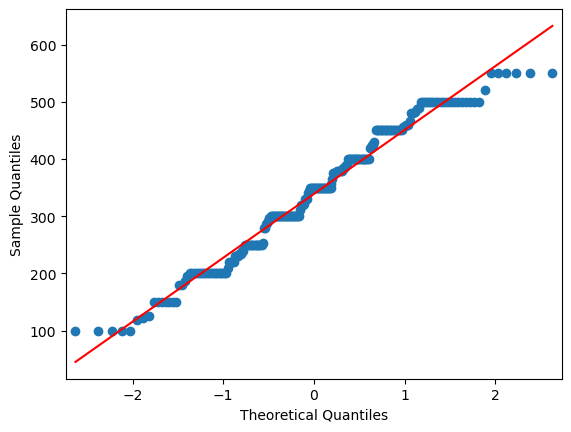

In [153]:
# check is data is notmally distributed
df1.iloc[:,8] =  df1.iloc[:,8].astype("Int64")

# plot qqplot
sm.qqplot(df1.iloc[:, 8].dropna(), line = "s")
plt.show()

Data is fairly notmally distributed so we will proceed to input the values using a normal distribution 

In [154]:
def sample_normal(mean, sd, ub, lb):
    sample = np.random.normal(loc=mean, scale=sd)
    while sample > ub*1.1 or sample < lb*1.1:
        sample = np.random.normal(loc=mean, scale=sd)
    return sample

In [155]:
# data values
mean = np.mean(df1.iloc[:, 8])
sd = np.std(df1.iloc[:, 8])
ub = np.max(df1.iloc[:, 8])
lb = np.min(df1.iloc[:, 8])

#input data 
for i in range(len(df1.iloc[:,8])):
    if pd.isna(df1.iloc[i, 8]):
        df1.iloc[i, 8] = sample_normal(mean, sd, ub, lb)

In [156]:
df1.iloc[:, 8] = df1.iloc[:, 8].astype(int)
df1.iloc[:, 8].value_counts()

How many students do you estimate there are in the room?
300    29
350    22
500    21
400    20
200    20
       ..
142     1
406     1
287     1
483     1
520     1
Name: count, Length: 63, dtype: int64

<Axes: ylabel='Frequency'>

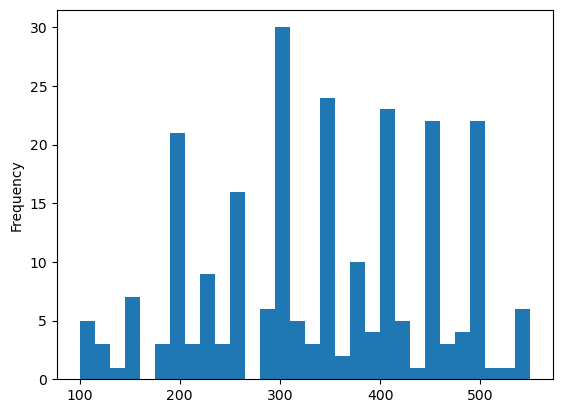

In [157]:
df1.iloc[:, 8].plot(kind = "hist", bins = 30)

#### Stress

In [158]:
df1.iloc[:, 9].unique()

array(['78', '1000', '101', '60', '50', '99,7', '30', '70', '100', '20',
       '5', '8', '9999', '15', '75', '1E+14', '2', '3', '55', '80', '10',
       '45', '89', '0', '49', '72', '6', '13', '11', '35', '66', '90',
       '40', '65', '200', '42', '99999', '47', '37', 'Over 9000', '79',
       '42.0', '85', '25', '110', '900', '22', '23', '67', '1', '69',
       'π©', '7', '57', '-10', '99', '24', '87', '-10000', '58', '23,23',
       '98', '-1', 'Now? 22', '77', nan, '63', '61', '33'], dtype=object)

In [159]:
# reset values if 
df1.iloc[:, 9] = df.iloc[:, 9]

In [160]:
exp = r"\d{1,3}"

for i in range(len(df1.iloc[:, 9])):

    stress = df1.iloc[i, 9]

    if pd.notna(stress):
        # if given number is very large then give maximum
        if len(stress) >= 3 and stress.isnumeric() and "-" not in stress:
            df1.iloc[i, 9] = "100"
        # give lowest value to negative values
        elif "-" in stress:
            df1.iloc[i, 9] = "0"
        # only non numeric -> NaN
        elif not stress.isnumeric():
            df1.iloc[i, 9] = np.nan
        # use regular expressions 
        else:
            # get pottential match 
            match = re.search(exp, stress)
            # set value depening on match status & criterion 
            if match:
                nstress = match.group(0)
                if int(nstress) <= 100 and int(nstress) >= 0:
                    df1.iloc[i, 9] = nstress
                    print(f"df1.iloc[{i}, 8] = {df1.iloc[i, 9 ]}")
                elif int(nstress) >= 100:
                    df1.iloc[i, 9] = "100"
                else:
                    df1.iloc[i, 9] = np.nan
            else:

                df1.iloc[i, 9] = np.nan

df1.iloc[0, 8] = 78
df1.iloc[3, 8] = 60
df1.iloc[4, 8] = 50
df1.iloc[6, 8] = 60
df1.iloc[7, 8] = 30
df1.iloc[8, 8] = 60
df1.iloc[9, 8] = 70
df1.iloc[11, 8] = 20
df1.iloc[12, 8] = 60
df1.iloc[13, 8] = 50
df1.iloc[14, 8] = 70
df1.iloc[16, 8] = 50
df1.iloc[17, 8] = 30
df1.iloc[19, 8] = 70
df1.iloc[20, 8] = 5
df1.iloc[21, 8] = 8
df1.iloc[23, 8] = 20
df1.iloc[24, 8] = 50
df1.iloc[25, 8] = 15
df1.iloc[26, 8] = 75
df1.iloc[28, 8] = 2
df1.iloc[29, 8] = 3
df1.iloc[30, 8] = 55
df1.iloc[31, 8] = 20
df1.iloc[34, 8] = 20
df1.iloc[35, 8] = 80
df1.iloc[36, 8] = 30
df1.iloc[37, 8] = 75
df1.iloc[38, 8] = 10
df1.iloc[39, 8] = 10
df1.iloc[40, 8] = 50
df1.iloc[41, 8] = 45
df1.iloc[42, 8] = 5
df1.iloc[43, 8] = 89
df1.iloc[44, 8] = 0
df1.iloc[45, 8] = 49
df1.iloc[47, 8] = 0
df1.iloc[48, 8] = 70
df1.iloc[49, 8] = 30
df1.iloc[50, 8] = 72
df1.iloc[51, 8] = 5
df1.iloc[52, 8] = 60
df1.iloc[53, 8] = 60
df1.iloc[54, 8] = 6
df1.iloc[55, 8] = 13
df1.iloc[56, 8] = 0
df1.iloc[57, 8] = 2
df1.iloc[58, 8] = 60
df1.iloc[5

In [161]:
df1.iloc[:, 9].unique()

array(['78', '100', '60', '50', nan, '30', '70', '20', '5', '8', '15',
       '75', '2', '3', '55', '80', '10', '45', '89', '0', '49', '72', '6',
       '13', '11', '35', '66', '90', '40', '65', '42', '47', '37', '79',
       '85', '25', '22', '23', '67', '1', '69', '7', '57', '99', '24',
       '87', '58', '98', '77', '63', '61', '33'], dtype=object)

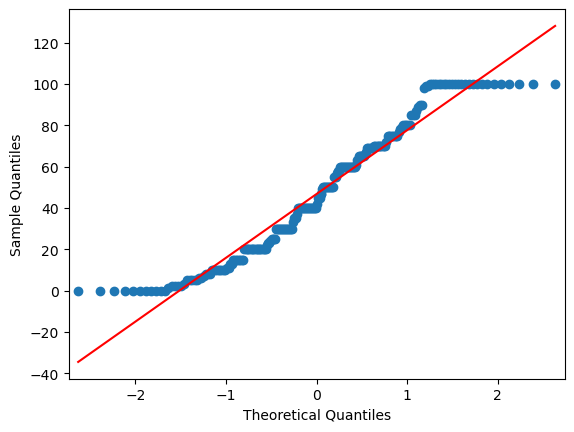

In [162]:
# check for normality
df1.iloc[:, 9] = df1.iloc[:, 9].astype("Int64")

sm.qqplot(df1.iloc[:, 9].dropna(), line = "s")
plt.show()

Data is not perfectly normal but we will use it anyways

In [163]:
# data values
mean = np.mean(df1.iloc[:, 9])
sd = np.std(df1.iloc[:, 9])
ub = np.max(df1.iloc[:, 9])
lb = np.min(df1.iloc[:, 9])

#input data 
for i in range(len(df1.iloc[:,9])):
    if pd.isna(df1.iloc[i, 9]):
        df1.iloc[i, 9] = sample_normal(mean, sd, ub, lb)

<Axes: ylabel='Frequency'>

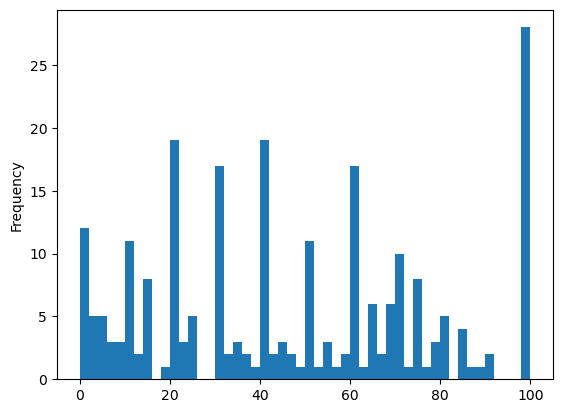

In [164]:
df1.iloc[:,9].plot(kind="hist", bins=50)

### Sports

In [165]:
df1.iloc[:, 10].unique()

array(['0', '2', '4', '6', '8', '1', '3', '4,5', '7', '10', '12', '4-5',
       '9', '5', '69', '15', '20', '23', '168', '4.5', '2h', '0😭😭😭',
       'zero', '3-4', '16', '14', '200', '11', '4,6', '4.5 hours', '13'],
      dtype=object)

In [166]:
#reset if needed
df1.iloc[:, 10] = df.iloc[:, 10]

In [167]:
def avg_str(g1, g2):
    val = (int(g1) + int(g2)) / 2
    return str(val)

In [168]:
express = [r"(\d{1})[\.\,\-](\d{1})", r"\d{1,2}"]

ds = 0
for i in range(len(df1.iloc[:, 10])):

    stress = df1.iloc[i, 10]

    if pd.notna(stress):

        # iterate over regular expressions 
        for idx, exp in enumerate(express):

            match = re.search(exp, stress)

            if match:
                print(f"Matched!! -> {match.group()}")
                # special input for values that are in decimal or range
                if idx == 0:
                    # return average 
                    if "-" in match.group(0):
                        df1.iloc[i, 10] = avg_str(match.group(1), match.group(2))
                        print(f"Avg str: {avg_str(match.group(1), match.group(2))}")
                    else:
                        df1.iloc[i, 10] = match.group(0).replace(",", ".")
                    break
                else:
                    # if found estimate is bellow or equal to 25 then set el NaN
                    if match.group() <= "25":
                        print("updated")
                        df1.iloc[i, 10] = match.group()
                        print(f"df1.iloc[{i}, 10] = {df1.iloc[i, 10]}")
                    else:
                        df1.iloc[i, 10] = np.nan
            else:
                df1.iloc[i, 10] = np.nan


Matched!! -> 0
updated
df1.iloc[0, 10] = 0
Matched!! -> 2
updated
df1.iloc[1, 10] = 2
Matched!! -> 4
Matched!! -> 6
Matched!! -> 8
Matched!! -> 8
Matched!! -> 4
Matched!! -> 1
updated
df1.iloc[7, 10] = 1
Matched!! -> 3
Matched!! -> 1
updated
df1.iloc[9, 10] = 1
Matched!! -> 4
Matched!! -> 4,5
Matched!! -> 8
Matched!! -> 4
Matched!! -> 2
updated
df1.iloc[14, 10] = 2
Matched!! -> 0
updated
df1.iloc[15, 10] = 0
Matched!! -> 7
Matched!! -> 10
updated
df1.iloc[17, 10] = 10
Matched!! -> 0
updated
df1.iloc[18, 10] = 0
Matched!! -> 0
updated
df1.iloc[19, 10] = 0
Matched!! -> 12
updated
df1.iloc[20, 10] = 12
Matched!! -> 6
Matched!! -> 10
updated
df1.iloc[22, 10] = 10
Matched!! -> 3
Matched!! -> 4
Matched!! -> 12
updated
df1.iloc[25, 10] = 12
Matched!! -> 6
Matched!! -> 7
Matched!! -> 4-5
Avg str: 4.5
Matched!! -> 10
updated
df1.iloc[29, 10] = 10
Matched!! -> 2
updated
df1.iloc[30, 10] = 2
Matched!! -> 9
Matched!! -> 10
updated
df1.iloc[32, 10] = 10
Matched!! -> 1
updated
df1.iloc[33, 10] = 1
M

In [169]:
df1.iloc[:, 10].unique()

array(['0', '2', nan, '1', '4.5', '10', '12', '15', '20', '23', '16',
       '3.5', '14', '11', '4.6', '13'], dtype=object)

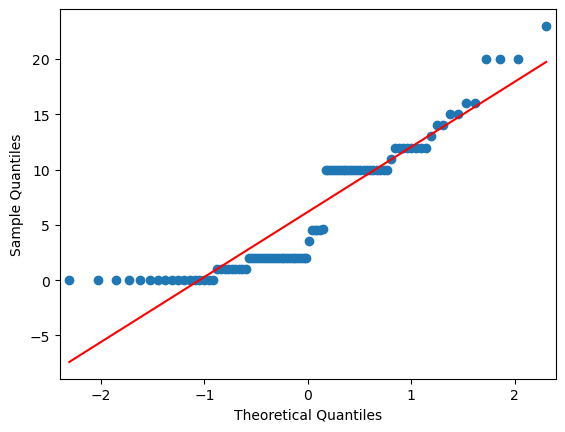

In [170]:
# check if data is normally dist
df1.iloc[:, 10] = df1.iloc[:, 10].astype(float)

sm.qqplot(df1.iloc[:, 10].dropna(), line="s")
plt.show()

<Axes: ylabel='Frequency'>

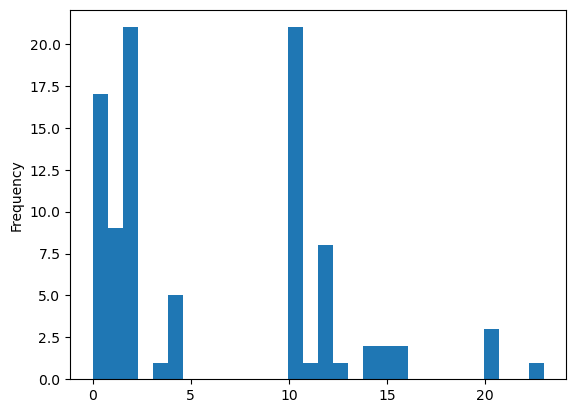

In [171]:
df1.iloc[:, 10].plot(kind = "hist", bins = 30)

Given that there is no real trend and the distribution is not explicit enough, then we would use the empirical distribution and do somehting like bootstrapping.

In [172]:
bootstrap_dist = df1.iloc[:, 10].dropna()

for i in range(len(df1.iloc[:, 10])):
    if pd.isna(df1.iloc[i, 10]):
        df1.iloc[i,10] = bootstrap_dist.sample(n=1).values[0]

### Bed time

In [173]:
df1.iloc[:, 11].unique()

array(['00:00', '12:30', '0:30', '23:00', '12', '5am', '12:00', '12am',
       '10:37', '0200', '11 pm', '23h45', '9 am', '9', '2 am', '01.00',
       '23.30', '23:16', '2', '1:00', '23.00', '1 am', '12:30 PM',
       '23:30', '00:30', '0.30', '1:00 am', '23:57', '05:00', '4:00',
       '22:30', '00:45', '01:30', '23:40', '3', '2am', '1am', '2:00',
       '23:59', '01:00', '04:00', '23-00', '4am', '00.30', '2.30', '1 AM',
       '12:00 pm', '22.00', '5', '11', '12:30am', '2300', '2 pm', '23',
       '23:55', '23:45', '1:30am', '12:34', '1', '00:40', '1:30', '12:45',
       '11:35', '23:25', '21:45', '7pm', '11:33 PM', '22:40', 'Midnight',
       '3AM', '03:00', '3am', '01:23', '8', '00:31', '3:54', '3 AM x)',
       '02:00', '11:30pm', '22:00', '5:00am', '12.30', 'around midnight',
       '23u30', '1.22am', '0:00', '3:00 ', '3:00', '4', '1:03 ', '00:10',
       '1:37', '11:00', '12.00', '00:30 AM', '00.15', '11:34', '5 AM',
       '00:33', '00:15', '4:30', '22:45', '9:30', '23:15', '02

In [174]:
df1.iloc[:, 11] = df.iloc[:, 11]

In [175]:
def set_hrs(hr, pm=True):
   
    if hr <= "12" and hr >= "7":
        if len(hr) == 2:
            print(f"This is the hour to be edited {hr}")
            return str(int(hr) + 12) if hr != "12" else "00"
        elif len(hr) == 1:
            return str(int("0" + hr) + 12) if hr != "12" else "00"
    else:
        if len(hr) == 2:
            return hr if hr != "12" else "00"
        elif len(hr) == 1:
            return "0" + hr if hr != "12" else "00"

In [176]:
express = [r"(\d{1,2})[\.\:](\d{2})\s?(?:am|pm)?",
            r"(\d{1,2})\s?(?:am|pm)", r"\d{1,2}"]

# r"\d{2}[uh]\d{2}"

x = "7 am"

for i in range(len(df1.iloc[:, 11])):

    # get time 
    time = df1.iloc[i, 11].lower()
    updated = False

    print(f"\t\tCurrent time: {time}")
    if pd.notna(time):

        for idx, exp in enumerate(express):
            
            match = re.search(exp, time)
            print(f"Current{i} with exp#{idx} = {match}")

            if match:
                # pm time 
                if "pm" in match.group(0).lower():
                    print("First if: ", match.group())
                    if idx == 0:
                        # hrs = str(int(match.group(1)) + 12) if match.group(1) != "12" else "00"
                        hr = set_hrs(match.group(1))
                        min = match.group(2)
                        time = hrs + ":" + min
                        df1.iloc[i, 11] = time
                        
                    elif idx == 1:
                        hrs = str(int(match.group(1)) + 12)
                        min = "00"
                        time = hrs + ":" + min
                        df1.iloc[i, 11] = time
                # am time       
                elif "am" in match.group(0).lower():

                    print("Second if: ", match.group())
                    if idx == 0:
                        hrs = match.group(1) if len(match.group(1)) == 2 else "0" + match.group(1)
                        df1.iloc[i, 11] = hrs + ":" + match.group(2) 
                        
                    if idx == 1:
                        hrs = match.group(1) if len(match.group(1)) == 1 else "0" + match.group(1)
                        df1.iloc[i, 11] = hrs + ":" + "00"

                # time w
                elif len(match.groups()) == 2:
                    print("Third if: ", match.group(), match.group(1))
                    hr = set_hrs(match.group(1))
                    df1.iloc[i, 11] = hr + ":" + match.group(2)
                
                # single 
                else: 
                    print("Fourth if: ", match.group())
                    if match.group() >= "9":
                        hr = set_hrs(match.group(0))
                    else:
                        hr = "0" + match.group(0)
                    
                    df1.iloc[i, 11] = hr + ":" + "00"

                updated = True
                break

        if updated:
            continue
        else:
            df1.iloc[i, 11] = np.nan



		Current time: 00:00
Current0 with exp#0 = <re.Match object; span=(0, 5), match='00:00'>
Third if:  00:00 00
		Current time: 12:30
Current1 with exp#0 = <re.Match object; span=(0, 5), match='12:30'>
Third if:  12:30 12
		Current time: 0:30
Current2 with exp#0 = <re.Match object; span=(0, 4), match='0:30'>
Third if:  0:30 0
		Current time: 23:00
Current3 with exp#0 = <re.Match object; span=(0, 5), match='23:00'>
Third if:  23:00 23
		Current time: 12
Current4 with exp#0 = None
Current4 with exp#1 = None
Current4 with exp#2 = <re.Match object; span=(0, 2), match='12'>
Fourth if:  12
		Current time: 5am
Current5 with exp#0 = None
Current5 with exp#1 = <re.Match object; span=(0, 3), match='5am'>
Second if:  5am
		Current time: 12:00
Current6 with exp#0 = <re.Match object; span=(0, 5), match='12:00'>
Third if:  12:00 12
		Current time: 12am
Current7 with exp#0 = None
Current7 with exp#1 = <re.Match object; span=(0, 4), match='12am'>
Second if:  12am
		Current time: 10:37
Current8 with exp#

In [177]:
df1.iloc[:, 11].unique()

array(['00:00', '00:30', '23:00', '012:00', '5:00', '10:37', '002:00',
       '023:00', '9:00', '09:00', '2:00', '01:00', '23:30', '23:16',
       '02:00', '1:00', '1:30', '23:57', '05:00', '04:00', '22:30',
       '00:45', '01:30', '23:40', '03:00', '23:59', '4:00', '02:30',
       '22:00', '011:00', '12:30', '14:00', '23:55', '23:45', '00:34',
       '00:40', '11:35', '23:25', '21:45', '19:00', '19:33', '22:40', nan,
       '3:00', '01:23', '08:00', '00:31', '03:54', '4:30', '01:22',
       '01:03', '00:10', '01:37', '11:00', '00:15', '11:34', '00:33',
       '5:30', '04:30', '22:45', '09:30', '23:15', '02:15', '21:30',
       '010:00', '00:54'], dtype=object)

In [178]:
exp = r"(\d{1,3})[\:](\d{2})"

for i in range(len(df1.iloc[:, 11])):
    time = df1.iloc[i, 11]
    if pd.notna(time):
        
        # find matches
        m = re.search(exp, time)
        if m:
            hr = m.group(1)
            min = m.group(2)
            if (hr > "8" or hr >= "08") and hr <= "12":
                if hr == "12":
                    hr = "00"
                else:
                    hr = str(int(hr) + 12)
            if len(hr) == 3:
                hr = hr[1:]
            if len(hr) == 1:
                hr = "0" + hr
            print("final hr: ", hr)
            df1.iloc[i, 11] = hr + ":" + min

final hr:  00
final hr:  00
final hr:  00
final hr:  23
final hr:  12
final hr:  05
final hr:  00
final hr:  12
final hr:  22
final hr:  02
final hr:  23
final hr:  00
final hr:  23
final hr:  09
final hr:  21
final hr:  02
final hr:  01
final hr:  23
final hr:  23
final hr:  02
final hr:  01
final hr:  23
final hr:  13
final hr:  13
final hr:  23
final hr:  00
final hr:  00
final hr:  02
final hr:  01
final hr:  12
final hr:  00
final hr:  23
final hr:  05
final hr:  12
final hr:  23
final hr:  04
final hr:  22
final hr:  00
final hr:  00
final hr:  01
final hr:  00
final hr:  23
final hr:  12
final hr:  23
final hr:  03
final hr:  02
final hr:  13
final hr:  02
final hr:  23
final hr:  12
final hr:  00
final hr:  01
final hr:  04
final hr:  02
final hr:  23
final hr:  00
final hr:  04
final hr:  01
final hr:  00
final hr:  02
final hr:  13
final hr:  13
final hr:  13
final hr:  23
final hr:  22
final hr:  05
final hr:  11
final hr:  00
final hr:  23
final hr:  02
final hr:  00
final 

In [179]:
df1.iloc[:, 11].unique()

array(['00:00', '00:30', '23:00', '12:00', '05:00', '22:37', '02:00',
       '09:00', '21:00', '01:00', '23:30', '23:16', '13:00', '13:30',
       '23:57', '04:00', '22:30', '00:45', '01:30', '23:40', '03:00',
       '23:59', '02:30', '22:00', '11:00', '14:00', '23:55', '23:45',
       '00:34', '00:40', '23:35', '23:25', '21:45', '19:00', '19:33',
       '22:40', nan, '01:23', '20:00', '00:31', '03:54', '04:30', '01:22',
       '01:03', '00:10', '01:37', '00:15', '23:34', '00:33', '05:30',
       '22:45', '21:30', '23:15', '02:15', '10:00', '00:54'], dtype=object)

<Axes: xlabel='Time you went to bed Yesterday'>

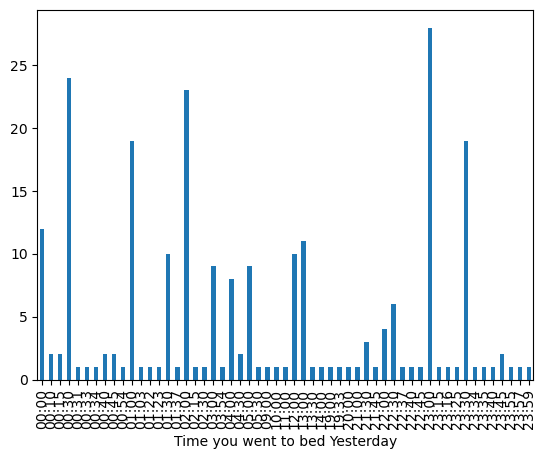

In [180]:
df1.iloc[:, 11].value_counts().sort_index().plot(kind = "bar")

Given that there is no clear distribution we will be imputing data using the empirical distribution:


In [181]:
bootstrap_dist2 = df1.iloc[:, 11].dropna()

for i in range(len(df1.iloc[:, 11])):
    if pd.isna(df1.iloc[i, 11]):
        df1.iloc[i, 11] = bootstrap_dist2.sample(n=1).values[0]

In [182]:
len(df1)

243

#### Now we do some feature enginnering 

In [183]:
mins = []
exp = r"(\d{2})[\:](\d{2})"

for i in range(len(df1)):

    match = re.search(exp, df1.iloc[i, 11])
    hr = int(match.group(1))
    min = int(match.group(2))
    min_awake = -9*60

    if hr <= 9:
        min_awake += hr*60 + 24*60 + min
    else:
        min_awake += hr*60 + min
    
    if min_awake == -60:
        print(df1.iloc[i, 1])
    
    mins.append(min_awake)

df1["Time awake since 09:00"] = mins

In [184]:
df1["Time awake since 09:00"].unique()

array([ 900,  930,  840,  180, 1200,  817, 1020, 1440,  720,  960,  870,
        856,  240,  270,  897, 1140,  810,  945,  990,  880, 1080,  899,
       1050,  780,  120,  300,  895,  885,  934,  940,  875,  865,  765,
        600,  633,  820,  983,  660,  931, 1134, 1170,  982,  963,  910,
        997,  915,  874,  933, 1230,  825,  750,  855, 1035,   60,  954],
      dtype=int64)

<Axes: ylabel='Frequency'>

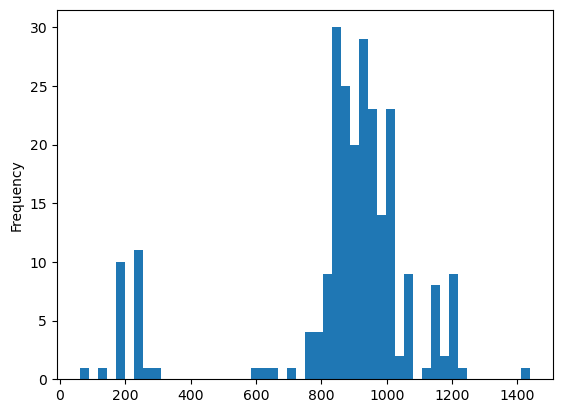

In [185]:
df1.iloc[:, 14].plot(kind = "hist", bins = 50)

### Finalizing data and saving

In [186]:
df1.columns

Index(['What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
       'When is your birthday (date)?',
       'How many students do you estimate there are in the room?',
       'What is your stress level (0-100)?',
       'How many hours per week do you do sports (in whole hours)? ',
       'Time you went to bed Yesterday', 'What makes a good day for you (1)?',
       'What makes a good day for you (2)?', 'Time awake since 09:00'],
      dtype='object')

In [187]:
df_final = df1.drop(columns=['What makes a good day for you (2)?', 'What makes a good day for you (1)?'])
df_final.columns

Index(['What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
       'When is your birthday (date)?',
       'How many students do you estimate there are in the room?',
       'What is your stress level (0-100)?',
       'How many hours per week do you do sports (in whole hours)? ',
       'Time you went to bed Yesterday', 'Time awake since 09:00'],
      dtype='object')

In [188]:
df_final.to_csv("final_data_sebas.csv", index = False)